In [1]:
import numpy as np
import matplotlib.pyplot as plt


from astropy.io import fits
from astropy.table import Table
from astropy import units as u
from astropy.io import ascii


# load 3d dust maps
# load halpha emission from MW (whampy)

In [2]:
# read survey tables
darks = ascii.read('_data-sky/darks.txt')
darks.info()
# read dark patches table


<Table length=675>
 name  dtype 
----- -------
    i   int64
   ra float64
  dec float64
    l float64
    b float64
IMW80 float64
IMW40 float64


In [3]:
lvm = ascii.read('_data-sky/survey.txt')
lvm.add_column(np.arctan(lvm["lunation"])*180/np.pi, name="moon_sun_sep")
lvm = lvm[lvm['ra']!=-999.0]
lvm.info()

<Table length=24758>
     name      dtype 
------------- -------
           JD float64
  observatory    str3
       target   str12
        group    str6
       tileid   int64
        index   int64
           ra float64
          dec float64
           pa float64
      airmass float64
     lunation float64
shadow_height float64
    moon_dist float64
          lst float64
      exptime float64
    totaltime float64
 moon_sun_sep float64


In [4]:
from datetime import datetime, timedelta


ra, dec = 121.75, -29.7
ini_dt = datetime.fromisoformat("2012-07-17T21:12:14")
fin_dt = ini_dt + timedelta(days=19)

In [5]:
from lvmdrp.core import sky

# _, sky_comps = sky.get_sky_model(wmin=365, wmax=1040, wres=3000, observatory="lasilla", date=ini_dt.strftime("%Y-%m-%dT%H:%M:%S"))
# _, sky_comps_later = sky.get_sky_model(wmin=365, wmax=1040, wres=3000, observatory="lasilla", date=fin_dt.strftime("%Y-%m-%dT%H:%M:%S"))

# plt.figure(figsize=(20,5))
# plt.plot(sky_comps["lam"], sky_comps["flux"])
# plt.plot(sky_comps["lam"], sky_comps_later["flux"])

In [6]:
lvm.to_pandas().head()

,JD,observatory,target,group,tileid,index,ra,dec,pa,airmass,lunation,shadow_height,moon_dist,lst,exptime,totaltime,moon_sun_sep
0,2.459946e+06,LCO,ORION_SPARSE,ORI,1001657,186,93.776208,-3.297009,421.400873,1.523737,0.71776,505.568352,61.801455,3.320358,900.0,990.0,35.669273
1,2.459946e+06,LCO,ORION_SPARSE,ORI,1001639,168,91.841575,-4.346719,421.529843,1.379519,0.71776,668.395932,60.266359,3.596111,900.0,990.0,35.669273
2,2.459946e+06,LCO,ORION_SPARSE,ORI,1001631,160,91.782095,-6.536020,421.358540,1.285270,0.71776,839.559813,60.895707,3.871864,900.0,990.0,35.669273
3,2.459946e+06,LCO,ORION_SPARSE,ORI,1001610,139,89.775465,-9.780659,421.539241,1.181422,0.71776,972.351738,60.140608,4.147617,900.0,990.0,35.669273
4,2.459946e+06,LCO,ORION_SPARSE,ORI,1001625,154,91.729707,-8.728141,421.224920,1.170123,0.71776,1209.546510,61.575579,4.423370,900.0,990.0,35.669273


In [7]:
from astropy.time import Time


i = 0

# survey = lvm[lvm["target"] == "ORION_SPARSE"]
# sky_comps = {}
# for idx, row in survey.to_pandas().iterrows():
#     date = Time(row.JD, format="jd") - timedelta(days=5*365)

#     _, sky_comps[idx], pars = sky.get_sky_model(
#         wmin=365, wmax=1040, wres=3000,
#         observatory="lasilla", date=date.strftime("%Y-%m-%dT%H:%M:%S"),
#         ra=row.ra, dec=row.dec,
#         return_pars=True
#     )
#     # print(pars)
#     # if i == 1: break
#     # i += 1

In [8]:
darks

i,ra,dec,l,b,IMW80,IMW40
int64,float64,float64,float64,float64,float64,float64
0,319.68795221092313,-45.26864361805589,267.59964,-46.68978,-0.24234189,0.8356232643127441
1,2.650412155837834,-39.47509039484301,269.03006,-46.69001,-1.4840635,1.0377237796783447
2,6.711789345780377,-32.258977016699106,270.46054,-46.690243,0.21508251,1.0458816289901733
3,2.666433457553926,-27.057658187151876,271.881,-46.690475,-0.15321775,1.1158636808395386
4,357.96569412115764,-29.917190869842024,273.3115,-46.690712,0.22593807,1.2814888954162598
5,9.377530488273983,-27.848493068813852,272.85126,-45.840523,0.22058406,1.184716820716858
6,7.270952685775181,-30.10103650857994,271.45074,-45.840332,0.27971715,1.0159093141555786
7,5.562772613254794,-33.6861102494344,270.04025,-45.840137,0.22643507,1.0123960971832275
8,1.4268429954593171,-34.930023482640614,268.62976,-45.839947,0.15876262,0.8920636177062988


In [ ]:
# MaNGA super sky: 

Text(0, 0.5, 'EBV (mag)')

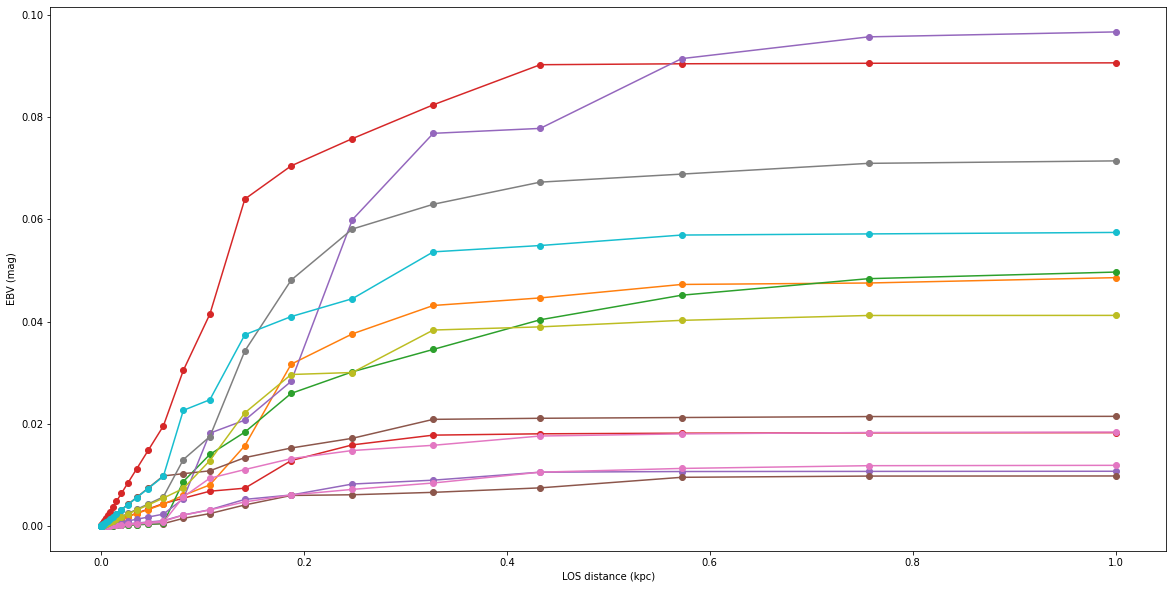

In [42]:
from dustmaps.bayestar import BayestarWebQuery
from astropy.coordinates import SkyCoord


bst = BayestarWebQuery(version="bayestar2015")
dist = np.logspace(np.log10(1e-12), np.log10(1), 100)
# plt.plot(dist, np.zeros_like(dist), "ok")

plt.figure(figsize=(20,10))
for idx, row in darks.to_pandas().head(20).iterrows():
    ebv = bst(SkyCoord(
        ra=row["ra"]*u.deg,
        dec=row["dec"]*u.deg,
        distance=dist*u.kpc,
    ), mode="median")

    plt.plot(dist, ebv, "o-")

plt.xlabel("LOS distance (kpc)")
plt.ylabel("EBV (mag)")

In [51]:
np.unique(lvm["group"])

ALLSKY
MCs
MW
ORI


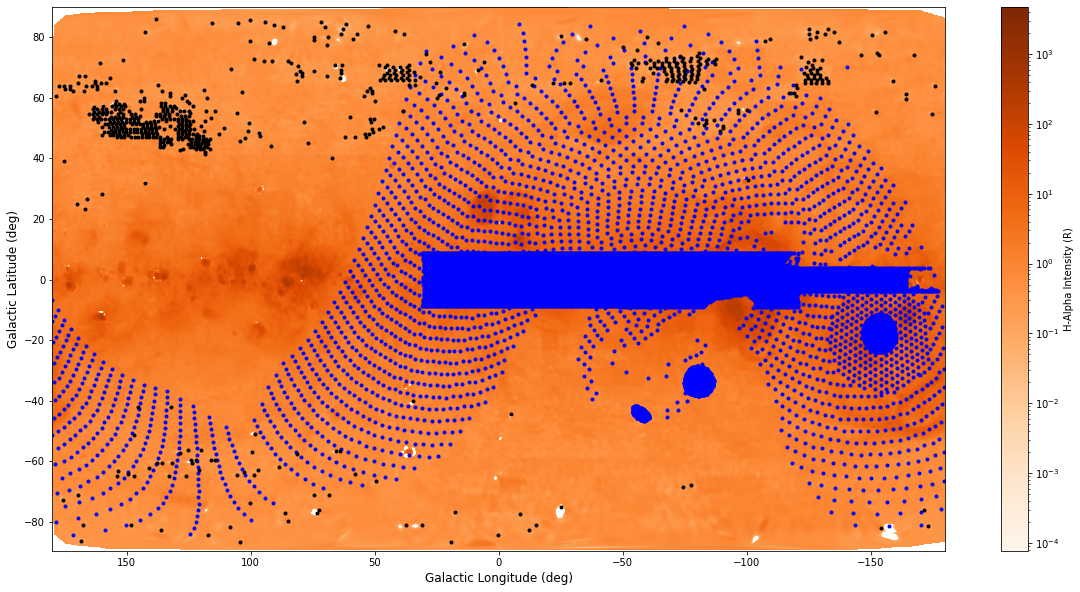

In [58]:
from whampy.skySurvey import SkySurvey


# u.add_enabled_units({"DEG": u.deg})

# Load Survey
wham = SkySurvey()
# Quick Sky Map
fig = wham.intensity_map(smooth=True, colorbar=True, cmap="Oranges", vmin=None, vmax=None, fig=plt.figure(figsize=(20,10)))
ax = plt.gca()

survey = lvm#[lvm["target"] == "ORION"]

dark_coords = SkyCoord(darks["ra"], darks["dec"], unit="deg")
dark_l = dark_coords.galactic.l.wrap_at(180*u.deg)
dark_b = dark_coords.galactic.b.wrap_at(90*u.deg)

ori_coords = SkyCoord(survey["ra"]*u.deg, survey["dec"]*u.deg)
ori_l = ori_coords.galactic.l.wrap_at(180*u.deg).value
ori_b = ori_coords.galactic.b.wrap_at(90*u.deg).value

ax.plot(ori_l, ori_b, ".b")
ax.plot(dark_l, dark_b, ".k")

# survey

In [57]:
from lvmsurveysim.utils import shadow_height_lib as sh


# TODO: pass the JD to use the correct ephemeris
# cross-match science targets with dark patches
# in order to get the JD for each dark patch
calculator = sh.shadow_calc()
ra, dec = calculator.cone_ra_dec()

calculator.set_coordinates(darks["ra"], darks["dec"])
shadow_heights = calculator.get_heights()